## Campos involucrados

- direccion
- idzona
- ciudad
- provincia
- lat
- lng

## Objetivos

- Normalizar (provincia, ciudad, dirección)
- Agregar información (geometry)
- Métodos para graficar (cantidad+densidad)
- Método para definir si x publicación está en una geometry

- Agregar información externa (distrito electoral, etc.)


In [1]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

In [2]:
#importo las funciones para levantar los dataframes
%run "../../utils/dataset_parsing.ipynb"
#importo las funciones para graficar
%run "../../utils/graphs.ipynb"

In [3]:
df = levantar_datos("../../"+DATASET_RELATIVE_PATH)
df["has_gps"] = ~ (df["lat"].isna() & df["lng"].isna())

In [47]:
df.head()

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio,mes,ano,dia,has_gps
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,False,False,False,False,False,2273000.0,8,2015,23,False
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,False,False,False,True,True,3600000.0,6,2013,28,True
2,247984,casa en venta urbi 3 recamaras tonala,descripcion \nla mejor ubicacion residencial e...,Casa,Urbi Tonala,Tonalá,Jalisco,5.0,3.0,2.0,...,False,False,False,False,False,1200000.0,10,2015,17,False
3,209067,casa sola en toluca zinacantepec con credito i...,casa en privada con caseta de vigilancia casas...,Casa,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,1.0,2.0,1.0,...,False,False,False,True,True,650000.0,3,2012,9,True
4,185997,paseos del sol,bonito departamento en excelentes condiciones ...,Apartamento,PASEOS DEL SOL,Zapopan,Jalisco,10.0,2.0,1.0,...,False,False,False,False,False,1150000.0,6,2016,7,False


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 27 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float16
habitaciones                  217529 non-null float16
garages                       202235 non-null float16
banos                         213779 non-null float16
metroscubiertos               222600 non-null float32
metrostotales                 188533 non-null float32
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                      

In [4]:
con_gps = df.loc[df["has_gps"]]

In [5]:
con_gps["geometry"] = geopandas.points_from_xy(con_gps.lng, con_gps.lat)

c:\users\dev\repos\fiuba\75-06\2019-2\tp\.venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [6]:
pais = geopandas.read_file("./MEX_adm/MEX_adm0.shp")
estados = geopandas.read_file("./MEX_adm/MEX_adm1.shp")
municipios = geopandas.read_file("./MEX_adm/MEX_adm2.shp")
ciudades = geopandas.read_file("./México_Centros_Urbanos/México_Centros_Urbanos.shp")

In [7]:
mexico = pais.iloc[0]["geometry"]

In [8]:
publi = geopandas.GeoDataFrame(con_gps)

In [9]:
publi.dropna(inplace=True)

In [22]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
mexico = world.loc[world.name == 'Mexico']

In [28]:
publi_mexico = geopandas.tools.sjoin(publi, mexico, how='left')

In [23]:
type(mexico)

geopandas.geodataframe.GeoDataFrame

In [51]:
ciudades.head()

,OBJECTID,CIUDAD,MUNICIPIO,ESTADO,geometry
0,1,TIJUANA,TIJUANA,BAJA CALIFORNIA,POLYGON ((-116.8780439426812 32.54230238368538...
1,2,TECATE,TECATE,BAJA CALIFORNIA,POLYGON ((-116.5986243768981 32.57139599994107...
2,3,MEXICALI,MEXICALI,BAJA CALIFORNIA,POLYGON ((-115.3779114550664 32.66245044792393...
3,4,SANTA ISABEL,MEXICALI,BAJA CALIFORNIA,POLYGON ((-115.5736914257759 32.64678042897413...
4,5,PROGRESO,MEXICALI,BAJA CALIFORNIA,"POLYGON ((-115.57519685666 32.59689131361723, ..."


In [50]:
ciudades["ESTADO"].value_counts()

PUEBLA                             63
JALISCO                            63
VERACRUZ DE IGNACIO DE LA LLAVE    62
MICHOACÁN DE OCAMPO                56
MÉXICO                             49
OAXACA                             42
SINALOA                            39
SONORA                             36
TAMAULIPAS                         34
COAHUILA DE ZARAGOZA               34
CHIAPAS                            33
YUCATÁN                            32
CHIHUAHUA                          31
NUEVO LEÓN                         29
GUANAJUATO                         27
SAN LUIS POTOSÍ                    27
BAJA CALIFORNIA                    26
HIDALGO                            25
GUERRERO                           25
ZACATECAS                          24
DURANGO                            18
CAMPECHE                           15
NAYARIT                            15
MORELOS                            15
TABASCO                            14
QUINTANA ROO                       10
QUERÉTARO DE

In [43]:
publi_mexico = publi_mexico.loc[publi_mexico["lng"] < -80]

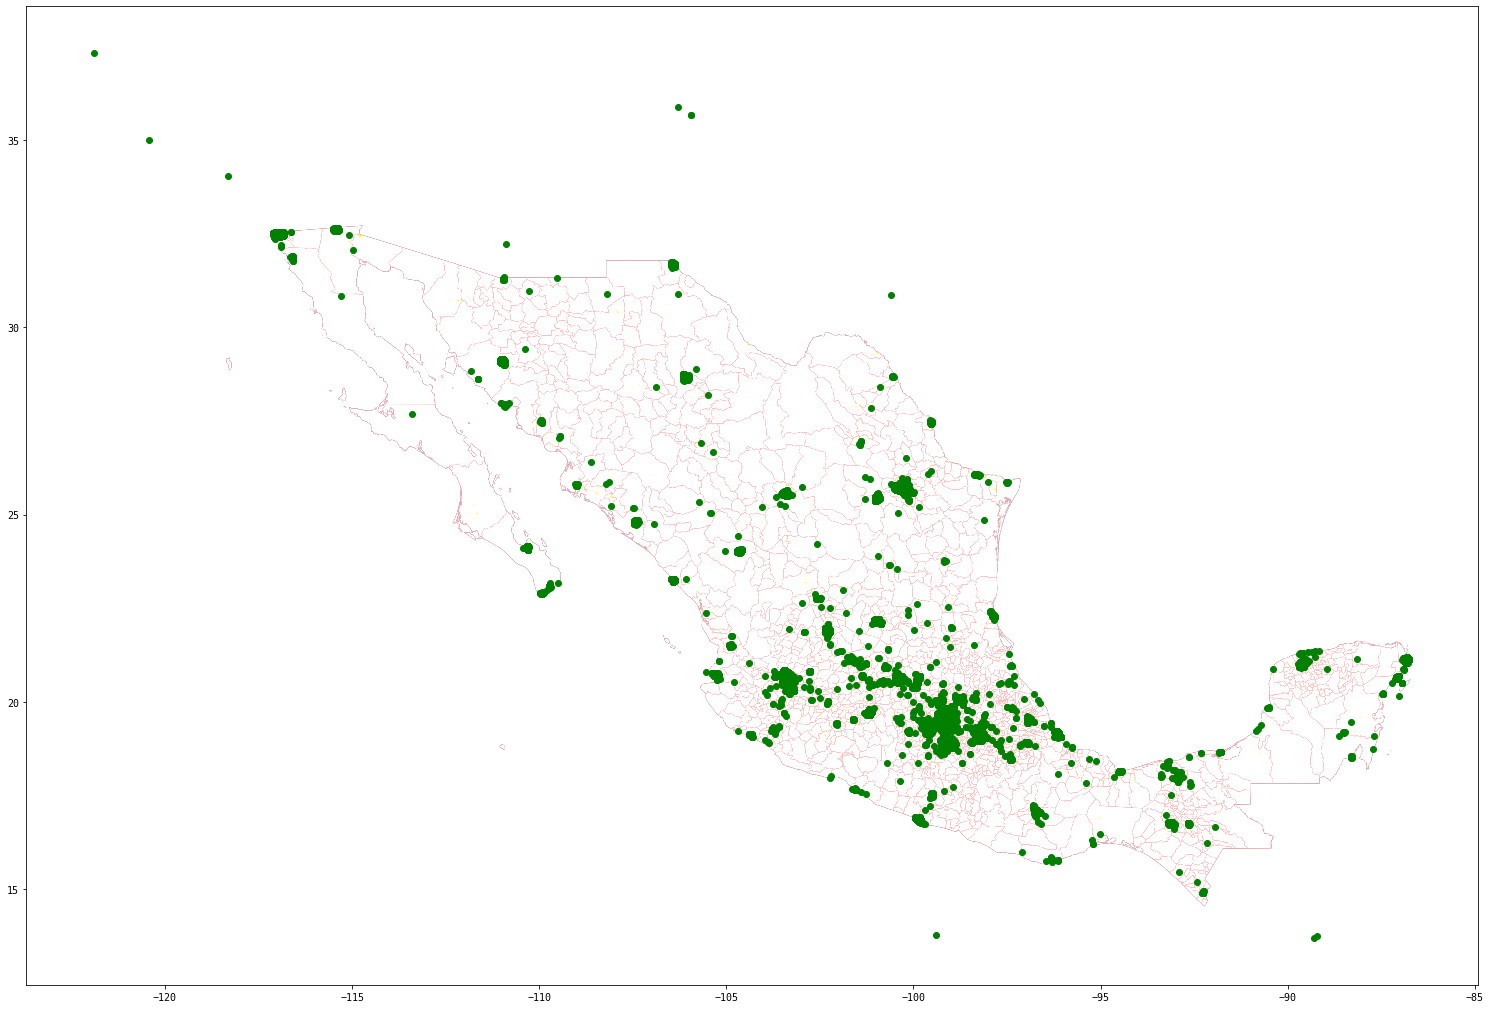

In [45]:
grafico = pais.plot(figsize=(36,18))
estados.plot(ax=grafico, color="red")
municipios.plot(ax=grafico, color="white")
ciudades.plot(ax=grafico, color="yellow")
publi_mexico.plot(ax=grafico, color="green")

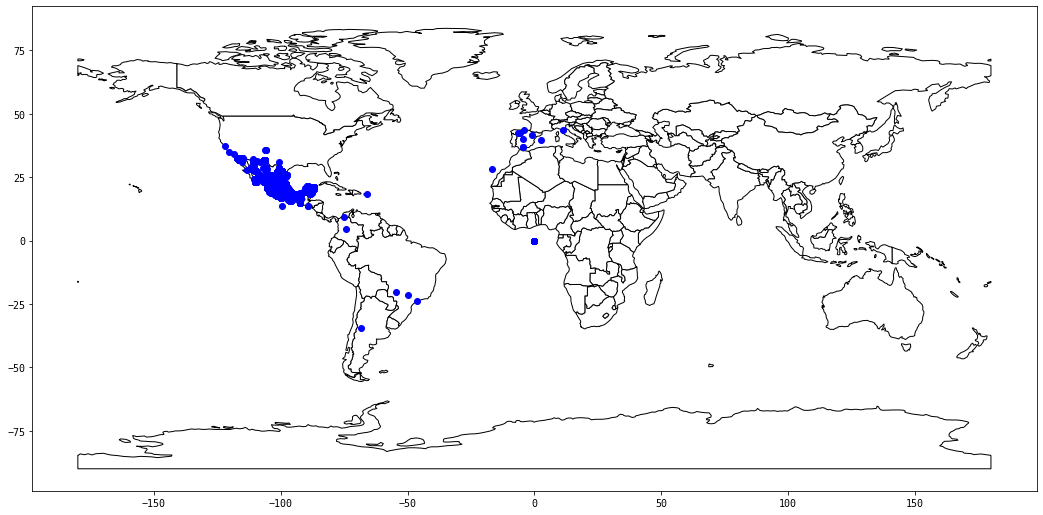

In [39]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black', figsize=(18,12))
a = publi_mexico.plot(ax=ax, color='blue')